<a href="https://colab.research.google.com/github/AlySerry0/CSEN903-Airline-Team-133/blob/main/Airline_133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA FETCHING

In [1]:
!git clone https://github.com/AlySerry0/CSEN903-Airline-RawData.git

raw_data_dir = '/content/CSEN903-Airline-RawData'

fatal: destination path 'CSEN903-Airline-RawData' already exists and is not an empty directory.


In [2]:
!pip install vaderSentiment shap lime tensorflow

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

import shap
import lime
import lime.lime_tabular

In [4]:
AirlineScrappedReview = pd.read_csv(f'{raw_data_dir}/AirlineScrappedReview_Cleaned.csv')
Customer_comment = pd.read_csv(f'{raw_data_dir}/Customer_comment.csv')
Passanger_Booking_Data = pd.read_csv(f'{raw_data_dir}/Passanger_booking_data.csv')
Survey_Data_Inflight_Satisfaction_Score = pd.read_csv(f'{raw_data_dir}/Survey data_Inflight Satisfaction Score.csv')

DATA CLEANING

In [5]:
AirlineScrappedReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passanger_Name   3574 non-null   object 
 1   Flying_Date      955 non-null    object 
 2   Route            2809 non-null   object 
 3   Rating           3575 non-null   int64  
 4   Verified         3575 non-null   object 
 5   Review_title     3575 non-null   object 
 6   Review_content   3575 non-null   object 
 7   Traveller_Type   3575 non-null   object 
 8   Class            3575 non-null   object 
 9   Start_Location   2809 non-null   object 
 10  End_Location     2809 non-null   object 
 11  Layover_Route    484 non-null    object 
 12  Start_Latitude   3515 non-null   float64
 13  Start_Longitude  3515 non-null   float64
 14  Start_Address    3515 non-null   object 
 15  End_Latitude     3476 non-null   float64
 16  End_Longitude    3476 non-null   float64
 17  End_Address   

In [6]:
AirlineScrappedReview.head()

Passanger_Name Flying_Date                  Route  Rating       Verified  \
0     Paige Boet   June 2023  New Orleans to London       1  Trip Verified   
1        S Layne  March 2023        London to Amman       1  Trip Verified   
2    E Lanewoski         NaN     Heathrow to Bodrum       2  Trip Verified   
3    Joel Burman   June 2023        Amman to London       4   Not Verified   
4        R Vines         NaN   London City to Ibiza       7  Trip Verified   

                             Review_title  \
0             The airline lost my luggage   
1  fully refunded by our travel insurance   
2             no boarding drinks provided   
3                       WiFi didn't work    
4                      stick with economy   

                                      Review_content  Traveller_Type  \
0  The airline lost my luggage and was absolutely...    Solo Leisure   
1  We booked on the BA website, round trip flight...  Couple Leisure   
2  First time flying with BA business class, neve...    Solo Leisure   
3  You can buy sandwiches and crisps but don't ex...    Solo Leisure   
4  This is a two-for-one review covering economy ...  Family Leisure   

            Class   Start_Location End_Location Layover_Route  Start_Latitude  \
0   Economy Class      New Orleans       London           NaN       29.975998   
1  Business Class           London        Amman           NaN       51.507446   
2  Business Class  London Heathrow       Bodrum           NaN       51.467739   
3   Economy Class            Amman       London           NaN       31.951569   
4  Business Class      London City        Ibiza           NaN       42.953765   

   Start_Longitude                                      Start_Address  \
0       -90.078213  New Orleans, Orleans Parish, Louisiana, United...   
1        -0.127765    London, Greater London, England, United Kingdom   
2        -0.458780  London Heathrow Airport, The Beacon Roundabout...   
3        35.923963  عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...   
4       -81.229153            London (city), Ontario, N6C 0A7, Canada   

   End_Latitude  End_Longitude  \
0     51.507446      -0.127765   
1     31.951569      35.923963   
2     37.034399      27.430651   
3     51.507446      -0.127765   
4     38.974390       1.419746   

                                         End_Address  
0    London, Greater London, England, United Kingdom  
1  عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...  
2                Bodrum, Muğla, Ege Bölgesi, Türkiye  
3    London, Greater London, England, United Kingdom  
4                     Eivissa, Illes Balears, España

In [7]:
AirlineScrappedReview.isnull().sum()

Passanger_Name        1
Flying_Date        2620
Route               766
Rating                0
Verified              0
Review_title          0
Review_content        0
Traveller_Type        0
Class                 0
Start_Location      766
End_Location        766
Layover_Route      3091
Start_Latitude       60
Start_Longitude      60
Start_Address        60
End_Latitude         99
End_Longitude        99
End_Address          99
dtype: int64

In [8]:
AirlineScrappedReview.describe(include='all')

Passanger_Name  Flying_Date                   Route       Rating  \
count            3574          955                    2809  3575.000000   
unique           2759          100                    1541          NaN   
top       David Ellis  August 2015  London to Johannesburg          NaN   
freq               44           25                      16          NaN   
mean              NaN          NaN                     NaN     4.790490   
std               NaN          NaN                     NaN     3.170323   
min               NaN          NaN                     NaN     1.000000   
25%               NaN          NaN                     NaN     2.000000   
50%               NaN          NaN                     NaN     4.000000   
75%               NaN          NaN                     NaN     8.000000   
max               NaN          NaN                     NaN    10.000000   

            Verified                     Review_title  \
count           3575                             3575   
unique             2                             2570   
top     Not Verified  British Airways customer review   
freq            2508                              947   
mean             NaN                              NaN   
std              NaN                              NaN   
min              NaN                              NaN   
25%              NaN                              NaN   
50%              NaN                              NaN   
75%              NaN                              NaN   
max              NaN                              NaN   

                                           Review_content  Traveller_Type  \
count                                                3575            3575   
unique                                               3501               6   
top     SFO-LHR-SFO in Premium Economy in December 201...  Couple Leisure   
freq                                                    2             949   
mean                                                  NaN             NaN   
std                                                   NaN             NaN   
min                                                   NaN             NaN   
25%                                                   NaN             NaN   
50%                                                   NaN             NaN   
75%                                                   NaN             NaN   
max                                                   NaN             NaN   

                Class   Start_Location     End_Location Layover_Route  \
count            3575             2809             2809           484   
unique              5              332              411            50   
top     Economy Class  London Heathrow  London Heathrow        London   
freq             1846              583              437           197   
mean              NaN              NaN              NaN           NaN   
std               NaN              NaN              NaN           NaN   
min               NaN              NaN              NaN           NaN   
25%               NaN              NaN              NaN           NaN   
50%               NaN              NaN              NaN           NaN   
75%               NaN              NaN              NaN           NaN   
max               NaN              NaN              NaN           NaN   

        Start_Latitude  Start_Longitude  \
count      3515.000000      3515.000000   
unique             NaN              NaN   
top                NaN              NaN   
freq               NaN              NaN   
mean         42.639473        -2.164986   
std          17.022014        44.576587   
min         -37.666951      -123.182909   
25%          41.893320        -0.458780   
50%          46.314475        -0.127765   
75%          51.467739        11.048029   
max          65.011873       151.208285   

                                            Start_Address  End_Latitude  \
count                      

In [9]:
columns_to_drop = [
    'Flying_Date',        # Too many missing values
    'Passanger_Name', 'Review_title',     # Unneeded identifiers
]

AirlineScrappedReview['Layover_Route'] = AirlineScrappedReview['Layover_Route'].fillna("None")
AirlineScrappedReview = AirlineScrappedReview.drop(columns=columns_to_drop)
AirlineScrappedReview = AirlineScrappedReview.replace('Unknown', np.nan)
AirlineScrappedReview = AirlineScrappedReview.dropna()
AirlineScrappedReview = AirlineScrappedReview.drop_duplicates()

In [10]:
# Display the final prepped DataFrame
print("\n--- Final Prepped DataFrame ---")
AirlineScrappedReview.head()


--- Final Prepped DataFrame ---


Route  Rating       Verified  \
0  New Orleans to London       1  Trip Verified   
1        London to Amman       1  Trip Verified   
2     Heathrow to Bodrum       2  Trip Verified   
3        Amman to London       4   Not Verified   
4   London City to Ibiza       7  Trip Verified   

                                      Review_content  Traveller_Type  \
0  The airline lost my luggage and was absolutely...    Solo Leisure   
1  We booked on the BA website, round trip flight...  Couple Leisure   
2  First time flying with BA business class, neve...    Solo Leisure   
3  You can buy sandwiches and crisps but don't ex...    Solo Leisure   
4  This is a two-for-one review covering economy ...  Family Leisure   

            Class   Start_Location End_Location Layover_Route  Start_Latitude  \
0   Economy Class      New Orleans       London          None       29.975998   
1  Business Class           London        Amman          None       51.507446   
2  Business Class  London Heathrow       Bodrum          None       51.467739   
3   Economy Class            Amman       London          None       31.951569   
4  Business Class      London City        Ibiza          None       42.953765   

   Start_Longitude                                      Start_Address  \
0       -90.078213  New Orleans, Orleans Parish, Louisiana, United...   
1        -0.127765    London, Greater London, England, United Kingdom   
2        -0.458780  London Heathrow Airport, The Beacon Roundabout...   
3        35.923963  عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...   
4       -81.229153            London (city), Ontario, N6C 0A7, Canada   

   End_Latitude  End_Longitude  \
0     51.507446      -0.127765   
1     31.951569      35.923963   
2     37.034399      27.430651   
3     51.507446      -0.127765   
4     38.974390       1.419746   

                                         End_Address  
0    London, Greater London, England, United Kingdom  
1  عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...  
2                Bodrum, Muğla, Ege Bölgesi, Türkiye  
3    London, Greater London, England, United Kingdom  
4                     Eivissa, Illes Balears, España

In [11]:
Customer_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                9424 non-null   int64 
 1   flight_number             9424 non-null   int64 
 2   origin_station_code       9424 non-null   object
 3   destination_station_code  9424 non-null   object
 4   scheduled_departure_date  9424 non-null   object
 5   arrival_delay_group       9424 non-null   object
 6   departure_delay_group     9424 non-null   object
 7   entity                    9424 non-null   object
 8   verbatim_text             9424 non-null   object
 9   seat_factor_band          9424 non-null   object
 10  ques_verbatim_text        9424 non-null   object
 11  loyalty_program_level     6920 non-null   object
 12  fleet_type_description    9424 non-null   object
 13  fleet_usage               9424 non-null   object
 14  response_group          

In [12]:
Customer_comment.head()

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date arrival_delay_group departure_delay_group  \
0               2022-09-01      Early & Ontime               Delayed   
1               2022-09-01      Early & Ontime               Delayed   
2               2022-09-01      Early & Ontime        Early & Ontime   
3               2022-09-01      Early & Ontime        Early & Ontime   
4               2022-09-01      Early & Ontime        Early & Ontime   

     entity                                      verbatim_text  \
0  Atlantic  There was no salad dressing. The staff informe...   
1  Atlantic                                      Not a choice.   
2  Domestic                    More variety and bigger snacks.   
3  Domestic  Serving pretzels and cookies in first class wa...   
4  Domestic  More inflight selections to purchase for full ...   

  seat_factor_band                                 ques_verbatim_text  \
0          0 to 70  Is there anything else you'd like to share abo...   
1          0 to 70  Is there anything else you'd like to share abo...   
2              90+  Is there anything else you'd like to share abo...   
3              90+  Is there anything else you'd like to share abo...   
4          0 to 70  Is there anything else you'd like to share abo...   

  loyalty_program_level fleet_type_description fleet_usage response_group  \
0             non-elite               B777-200    Mainline         member   
1                   NaN               B777-200    Mainline     non-member   
2             non-elite               A320-200    Mainline         member   
3          premier gold                ERJ-175     Express         member   
4             non-elite              B737-MAX8    Mainline         member   

  sentiments                                   transformed_text  
0    Neutral  salad dress staff inform flight receiv salad d...  
1    Neutral                                              choic  
2    Neutral                               varieti bigger snack  
3    Neutral  serv pretzel cooki first class extrem disappoi...  
4    Neutral                  inflight select purchas full meal

In [13]:
Customer_comment.isnull().sum()

Unnamed: 0                     0
flight_number                  0
origin_station_code            0
destination_station_code       0
scheduled_departure_date       0
arrival_delay_group            0
departure_delay_group          0
entity                         0
verbatim_text                  0
seat_factor_band               0
ques_verbatim_text             0
loyalty_program_level       2504
fleet_type_description         0
fleet_usage                    0
response_group                 0
sentiments                     0
transformed_text            1019
dtype: int64

In [14]:
Customer_comment.describe(include='all')

Unnamed: 0  flight_number origin_station_code  \
count   9424.000000    9424.000000                9424   
unique          NaN            NaN                 195   
top             NaN            NaN                 IAX   
freq            NaN            NaN                1149   
mean    4711.500000    1741.573430                 NaN   
std     2720.618802    1550.550037                 NaN   
min        0.000000       2.000000                 NaN   
25%     2355.750000     614.000000                 NaN   
50%     4711.500000    1286.000000                 NaN   
75%     7067.250000    2261.000000                 NaN   
max     9423.000000    6375.000000                 NaN   

       destination_station_code scheduled_departure_date arrival_delay_group  \
count                      9424                     9424                9424   
unique                      192                       30                   2   
top                         IAX               2022-09-10      Early & Ontime   
freq                       1427                      399                6811   
mean                        NaN                      NaN                 NaN   
std                         NaN                      NaN                 NaN   
min                         NaN                      NaN                 NaN   
25%                         NaN                      NaN                 NaN   
50%                         NaN                      NaN                 NaN   
75%                         NaN                      NaN                 NaN   
max                         NaN                      NaN                 NaN   

       departure_delay_group    entity verbatim_text seat_factor_band  \
count                   9424      9424          9424             9424   
unique                     2         4          8013                4   
top           Early & Ontime  Domestic           No.              90+   
freq                    6241      6593           774             6302   
mean                     NaN       NaN           NaN              NaN   
std                      NaN       NaN           NaN              NaN   
min                      NaN       NaN           NaN              NaN   
25%                      NaN       NaN           NaN              NaN   
50%                      NaN       NaN           NaN              NaN   
75%                      NaN       NaN           NaN              NaN   
max                      NaN       NaN           NaN              NaN   

                                       ques_verbatim_text  \
count                                                9424   
unique                                                  1   
top     Is there anything else you'd like to share abo...   
freq                                                 9424   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       loyalty_program_level fleet_type_description fleet_usage  \
count                   6920                   9424        9424   
unique                     7                     22           2   
top                non-elite               B737-900    Mainline   
freq                    4128                   1451        7985   
mean                     NaN                    NaN         NaN   
std                      NaN                    NaN         NaN   
min                      NaN                    NaN         NaN   
25%                      NaN                    NaN         NaN   
50%                      NaN                    NaN         NaN   
75%                      NaN                    NaN         NaN   
max 

In [15]:
print("\n--- Unique Values in Key Columns ---")
cols_to_check = ['arrival_delay_group', 'departure_delay_group', 'entity',
                 'seat_factor_band', 'loyalty_program_level', 'fleet_usage', 'response_group', 'sentiments']

for col in cols_to_check:
    print(f"Column '{col}': {Customer_comment[col].unique()}")


--- Unique Values in Key Columns ---
Column 'arrival_delay_group': ['Early & Ontime' 'Delayed']
Column 'departure_delay_group': ['Delayed' 'Early & Ontime']
Column 'entity': ['Atlantic' 'Domestic' 'Latin' 'Pacific']
Column 'seat_factor_band': ['0 to 70' '90+' '80+' '70+']
Column 'loyalty_program_level': ['non-elite' nan 'premier gold' 'premier 1k' 'premier silver'
 'global services' 'premier platinum' 'NBK']
Column 'fleet_usage': ['Mainline' 'Express']
Column 'response_group': ['member' 'non-member' 'NBK']
Column 'sentiments': ['Neutral' 'Negative']


In [16]:
# --- 1. Drop Unnecessary/Redundant Columns ---
columns_to_drop = [
    'Unnamed: 0',         # Duplicate index
    'ques_verbatim_text', # Only has one unique value, no info
    'transformed_text'    # Incomplete, and we have the raw 'verbatim_text'
]
Customer_comment = Customer_comment.drop(columns=columns_to_drop)

# --- 2. Handle Missing Data ---
# Fill missing loyalty levels with 'None'
Customer_comment['loyalty_program_level'] = Customer_comment['loyalty_program_level'].fillna('None')

# --- 3. Convert Data Types ---
# Convert date column to datetime objects
Customer_comment['scheduled_departure_date'] = pd.to_datetime(Customer_comment['scheduled_departure_date'])

Customer_comment = Customer_comment.drop_duplicates()

Customer_comment.info()
Customer_comment.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9422 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   flight_number             9422 non-null   int64         
 1   origin_station_code       9422 non-null   object        
 2   destination_station_code  9422 non-null   object        
 3   scheduled_departure_date  9422 non-null   datetime64[ns]
 4   arrival_delay_group       9422 non-null   object        
 5   departure_delay_group     9422 non-null   object        
 6   entity                    9422 non-null   object        
 7   verbatim_text             9422 non-null   object        
 8   seat_factor_band          9422 non-null   object        
 9   loyalty_program_level     9422 non-null   object        
 10  fleet_type_description    9422 non-null   object        
 11  fleet_usage               9422 non-null   object        
 12  response_group           

flight_number origin_station_code destination_station_code  \
0            950                 LHX                      SFX   
1            950                 LHX                      SFX   
2           1876                 FLX                      EWX   
3           5469                 SFX                      SEX   
4            281                 DEX                      ANX   

  scheduled_departure_date arrival_delay_group departure_delay_group  \
0               2022-09-01      Early & Ontime               Delayed   
1               2022-09-01      Early & Ontime               Delayed   
2               2022-09-01      Early & Ontime        Early & Ontime   
3               2022-09-01      Early & Ontime        Early & Ontime   
4               2022-09-01      Early & Ontime        Early & Ontime   

     entity                                      verbatim_text  \
0  Atlantic  There was no salad dressing. The staff informe...   
1  Atlantic                                      Not a choice.   
2  Domestic                    More variety and bigger snacks.   
3  Domestic  Serving pretzels and cookies in first class wa...   
4  Domestic  More inflight selections to purchase for full ...   

  seat_factor_band loyalty_program_level fleet_type_description fleet_usage  \
0          0 to 70             non-elite               B777-200    Mainline   
1          0 to 70                  None               B777-200    Mainline   
2              90+             non-elite               A320-200    Mainline   
3              90+          premier gold                ERJ-175     Express   
4          0 to 70             non-elite              B737-MAX8    Mainline   

  response_group sentiments  
0         member    Neutral  
1     non-member    Neutral  
2         member    Neutral  
3         member    Neutral  
4         member    Neutral

In [17]:
Passanger_Booking_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [18]:
Passanger_Booking_Data.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               1      Internet  RoundTrip             21              12   
1               2      Internet  RoundTrip            262              19   
2               1      Internet  RoundTrip            112              20   
3               2      Internet  RoundTrip            243              22   
4               1      Internet  RoundTrip             96              31   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            6        Tue  AKLHGH      Australia                    0   
1            7        Sat  AKLDEL    New Zealand                    1   
2            3        Sat  AKLDEL    New Zealand                    0   
3           17        Wed  AKLDEL          India                    1   
4            4        Sat  AKLDEL    New Zealand                    0   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             7.21   
1                     0                      0             5.52   
2                     0                      0             5.52   
3                     1                      0             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

In [19]:
Passanger_Booking_Data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [20]:
Passanger_Booking_Data.describe(include='all')

num_passengers sales_channel  trip_type  purchase_lead  \
count     50002.000000         50002      50002   50002.000000   
unique             NaN             2          3            NaN   
top                NaN      Internet  RoundTrip            NaN   
freq               NaN         44383      49498            NaN   
mean          1.591256           NaN        NaN      84.940582   
std           1.020167           NaN        NaN      90.450548   
min           1.000000           NaN        NaN       0.000000   
25%           1.000000           NaN        NaN      21.000000   
50%           1.000000           NaN        NaN      51.000000   
75%           2.000000           NaN        NaN     115.000000   
max           9.000000           NaN        NaN     867.000000   

        length_of_stay   flight_hour flight_day   route booking_origin  \
count     50002.000000  50002.000000      50002   50002          50002   
unique             NaN           NaN          7     799            104   
top                NaN           NaN        Mon  AKLKUL      Australia   
freq               NaN           NaN       8102    2680          17873   
mean         23.044778      9.066277        NaN     NaN            NaN   
std          33.887171      5.412569        NaN     NaN            NaN   
min           0.000000      0.000000        NaN     NaN            NaN   
25%           5.000000      5.000000        NaN     NaN            NaN   
50%          17.000000      9.000000        NaN     NaN            NaN   
75%          28.000000     13.000000        NaN     NaN            NaN   
max         778.000000     23.000000        NaN     NaN            NaN   

        wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count          50002.000000          50002.000000           50002.000000   
unique                  NaN                   NaN                    NaN   
top                     NaN                   NaN                    NaN   
freq                    NaN                   NaN                    NaN   
mean               0.668773              0.296968               0.427143   
std                0.470659              0.456927               0.494668   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               0.000000   
50%                1.000000              0.000000               0.000000   
75%                1.000000              1.000000               1.000000   
max                1.000000              1.000000               1.000000   

        flight_duration  booking_complete  
count      50002.000000      50002.000000  
unique              NaN               NaN  
top                 NaN               NaN  
freq                NaN               NaN  
mean           7.277524          0.149574  
std            1.496854          0.356657  
min            4.670000          0.000000  
25%            5.620000          0.000000  
50%            7.570000          0.000000  
75%            8.830000          0.000000  
max            9.500000          1.000000

In [21]:
print(Survey_Data_Inflight_Satisfaction_Score['score'].unique())
print(Survey_Data_Inflight_Satisfaction_Score['question_text'].unique())
print(Survey_Data_Inflight_Satisfaction_Score['driver_sub_group1'].unique())
print(Survey_Data_Inflight_Satisfaction_Score['driver_sub_group2'].unique())
print(Survey_Data_Inflight_Satisfaction_Score['media_provider'].unique())

Survey_Data_Inflight_Satisfaction_Score.info()

['2' '5' '3' '1' '4' 'chicken entrée' 'other (specify)'
 'vegetarian entrée' 'snack basket selection' 'sandwich/burger/wrap'
 'beef entrée' 'seafood entrée']
['How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?'
 'What item did you choose?']
['food & beverage']
['food and beverage satisfaction' 'comp']
[nan 'GOGO' 'PANASONIC' 'THALES' 'VIASAT']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   s

In [22]:
is_score = Survey_Data_Inflight_Satisfaction_Score['score'].str.isnumeric()
Survey_Data_Inflight_Satisfaction_Score['satisfaction_score'] = np.where(
    is_score,
    Survey_Data_Inflight_Satisfaction_Score['score'],
    np.nan
)

Survey_Data_Inflight_Satisfaction_Score['food_item_chosen'] = np.where(
    ~is_score,
    Survey_Data_Inflight_Satisfaction_Score['score'],
    np.nan
)


Survey_Data_Inflight_Satisfaction_Score['satisfaction_score'] = pd.to_numeric(Survey_Data_Inflight_Satisfaction_Score['satisfaction_score'], errors='coerce').astype('Int64')


Survey_Data_Inflight_Satisfaction_Score = Survey_Data_Inflight_Satisfaction_Score.drop('score', axis=1)


print(Survey_Data_Inflight_Satisfaction_Score[['satisfaction_score', 'food_item_chosen', 'question_text']].head(10))

Survey_Data_Inflight_Satisfaction_Score = Survey_Data_Inflight_Satisfaction_Score.drop(columns=['cabin_name'])
Survey_Data_Inflight_Satisfaction_Score['loyalty_program_level'] = Survey_Data_Inflight_Satisfaction_Score['loyalty_program_level'].fillna('None')
Survey_Data_Inflight_Satisfaction_Score = Survey_Data_Inflight_Satisfaction_Score.dropna(subset=['departure_gate'])
Survey_Data_Inflight_Satisfaction_Score = Survey_Data_Inflight_Satisfaction_Score.dropna(subset=['arrival_gate'])
Survey_Data_Inflight_Satisfaction_Score['media_provider'] = Survey_Data_Inflight_Satisfaction_Score['media_provider'].fillna(Survey_Data_Inflight_Satisfaction_Score['media_provider'].mode()[0])


   satisfaction_score food_item_chosen  \
0                   2              NaN   
1                   5              NaN   
2                   5              NaN   
3                   3              NaN   
4                   5              NaN   
5                   3              NaN   
6                   5              NaN   
7                   3              NaN   
8                   1              NaN   
9                   3              NaN   

                                       question_text  
0  How satisfied were you with the food & beverag...  
1  How satisfied were you with the food & beverag...  
2  How satisfied were you with the food & beverag...  
3  How satisfied were you with the food & beverag...  
4  How satisfied were you with the food & beverag...  
5  How satisfied were you with the food & beverag...  
6  How satisfied were you with the food & beverag...  
7  How satisfied were you with the food & beverag...  
8  How satisfied were you with the food & 

In [23]:
Survey_Data_Inflight_Satisfaction_Score.head()

flight_number origin_station_code destination_station_code record_locator  \
0           3802                 MKX                      ORX         CYXXJJ   
1           4645                 COX                      DEX         DRXXMH   
2           5236                 COX                      DEX         DEXXS1   
3           4686                 DEX                      COX         PXXXLH   
4            671                 DEX                      COX         KZXXH5   

  scheduled_departure_date                                      question_text  \
0                 9/1/2022  How satisfied were you with the food & beverag...   
1                 9/1/2022  How satisfied were you with the food & beverag...   
2                 9/1/2022  How satisfied were you with the food & beverag...   
3                 9/1/2022  How satisfied were you with the food & beverag...   
4                 9/1/2022  How satisfied were you with the food & beverag...   

  satisfaction_type driver_sub_group1               driver_sub_group2  \
0      Dissatisfied   food & beverage  food and beverage satisfaction   
1         Satisfied   food & beverage  food and beverage satisfaction   
2         Satisfied   food & beverage  food and beverage satisfaction   
3      Dissatisfied   food & beverage  food and beverage satisfaction   
4         Satisfied   food & beverage  food and beverage satisfaction   

   arrival_delay_minutes  ... actual_flown_miles haul_type departure_gate  \
0                    -24  ...                 67     Short            C12   
1                     10  ...                 72     Short              5   
2                     -8  ...                 72     Short              7   
3                    -11  ...                 72     Short            B82   
4                     18  ...                 72     Short            B24   

   arrival_gate international_domestic_indicator response_group  \
0           F10                         Domestic     non-member   
1           B60                         Domestic         member   
2           A71                         Domestic         member   
3             5                         Domestic         member   
4             3                         Domestic         member   

  media_provider        hub_spoke satisfaction_score food_item_chosen  
0      PANASONIC  spoke departure                  2              NaN  
1           GOGO  spoke departure                  5              NaN  
2           GOGO  spoke departure                  5              NaN  
3      PANASONIC    hub departure                  3              NaN  
4      PANASONIC    hub departure                  5              NaN  

[5 rows x 31 columns]

In [24]:
Survey_Data_Inflight_Satisfaction_Score.isnull().sum()

flight_number                           0
origin_station_code                     0
destination_station_code                0
record_locator                          0
scheduled_departure_date                0
question_text                           0
satisfaction_type                   12094
driver_sub_group1                       0
driver_sub_group2                       0
arrival_delay_minutes                   0
arrival_delay_group                     0
cabin_code_desc                         0
entity                                  3
number_of_legs                          0
seat_factor_band                        0
loyalty_program_level                   0
generation                              0
fleet_type_description                  0
fleet_usage                             0
equipment_type_code                     0
ua_uax                                  0
actual_flown_miles                      0
haul_type                               0
departure_gate                          0
arrival_gate                            0
international_domestic_indicator        0
response_group                          0
media_provider                          0
hub_spoke                               0
satisfaction_score                  12094
food_item_chosen                    34357
dtype: int64

In [25]:
Survey_Data_Inflight_Satisfaction_Score.describe(include='all')

flight_number origin_station_code destination_station_code  \
count    46451.000000               46451                    46451   
unique            NaN                 207                      188   
top               NaN                 IAX                      EWX   
freq              NaN                5654                     7056   
mean      1483.641493                 NaN                      NaN   
std       1408.242555                 NaN                      NaN   
min          2.000000                 NaN                      NaN   
25%        468.000000                 NaN                      NaN   
50%       1034.000000                 NaN                      NaN   
75%       2020.000000                 NaN                      NaN   
max       6375.000000                 NaN                      NaN   

       record_locator scheduled_departure_date  \
count           46451                    46451   
unique          32549                       30   
top            N7XXH4                9/10/2022   
freq                6                     1845   
mean              NaN                      NaN   
std               NaN                      NaN   
min               NaN                      NaN   
25%               NaN                      NaN   
50%               NaN                      NaN   
75%               NaN                      NaN   
max               NaN                      NaN   

                                            question_text satisfaction_type  \
count                                               46451             34357   
unique                                                  2                 2   
top     How satisfied were you with the food & beverag...      Dissatisfied   
freq                                                34357             21979   
mean                                                  NaN               NaN   
std                                                   NaN               NaN   
min                                                   NaN               NaN   
25%                                                   NaN               NaN   
50%                                                   NaN               NaN   
75%                                                   NaN               NaN   
max                                                   NaN               NaN   

       driver_sub_group1               driver_sub_group2  \
count              46451                           46451   
unique                 1                               2   
top      food & beverage  food and beverage satisfaction   
freq               46451                           34357   
mean                 NaN                             NaN   
std                  NaN                             NaN   
min                  NaN                             NaN   
25%                  NaN                             NaN   
50%                  NaN                             NaN   
75%                  NaN                             NaN   
max                  NaN                             NaN   

        arrival_delay_minutes  ... actual_flown_miles haul_type  \
count            46451.000000  ...       46451.000000     46451   
unique                    NaN  ...                NaN         3   
top                       NaN  ...                NaN    Medium   
freq                      NaN  ...                NaN     26149   
mean                -1.724936  ...        2504.397193       NaN   
std                 37.953904  ...        1863.281349       NaN   
min               -104.000000  ...          45.000000       NaN   
25%                -19.000000  ...         960.000000       NaN   
50%                 -9.000000  ...        1874.000000       NaN   
75%                  4.000000  ...        3892.000000       NaN   
max                907.000000  ...        8440.000000       NaN   

       departure_gate  arrival_gate international_domestic_indicator  \
count           464

DATA ENGINEERING QUESTIONS

In [26]:
AirlineScrappedReview['Satisfaction'] = (AirlineScrappedReview['Rating'] >= 5).astype(int)
sia = SentimentIntensityAnalyzer()
AirlineScrappedReview['Sentiment_Score'] = AirlineScrappedReview['Review_content'].apply(
    lambda review: sia.polarity_scores(review)['compound']
)

The most popular 10 routes are: Route
London to Johannesburg    16
London to Cape Town       15
Vancouver to London       13
Johannesburg to London    13
BKK to LHR                13
Cape Town to London       13
LHR to MIA                12
London to Hong Kong       11
London to Athens          11
Hong Kong to London       11
Name: count, dtype: int64
Saved bar chart to top_10_routes_barchart.png


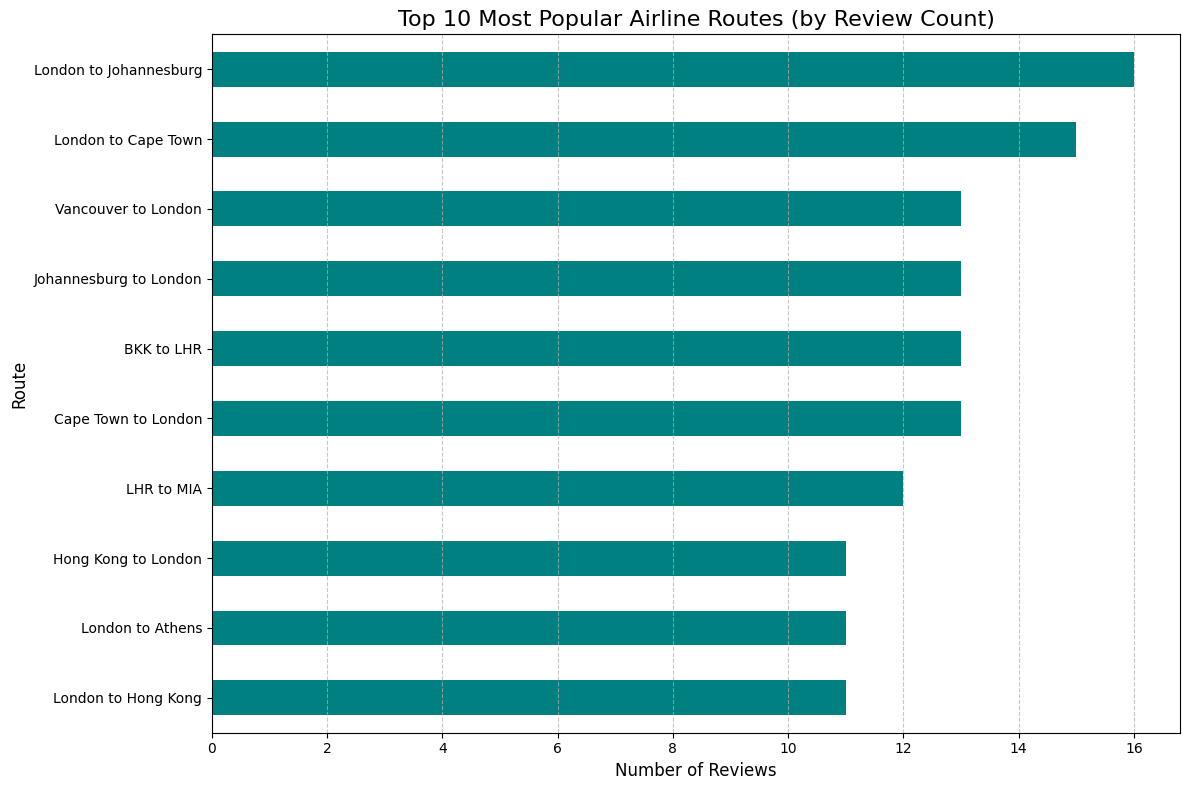

In [27]:
top_10_routes = AirlineScrappedReview['Route'].value_counts().head(10)
print("The most popular 10 routes are:" , top_10_routes)

plt.figure(figsize=(12, 8)) # Set a good size for readability
top_10_routes.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('Top 10 Most Popular Airline Routes (by Review Count)', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Route', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('top_10_routes_barchart.png')
print("Saved bar chart to top_10_routes_barchart.png")

flight_hour
0     1539
1     2089
2     2642
3     2655
4     2843
5     2851
6     3051
7     3126
8     3165
9     3133
10    3085
11    3110
12    3163
13    3101
14    2833
15    2234
16    1557
17     861
18     439
19     295
20     276
21     389
22     579
23     986
Name: count, dtype: int64


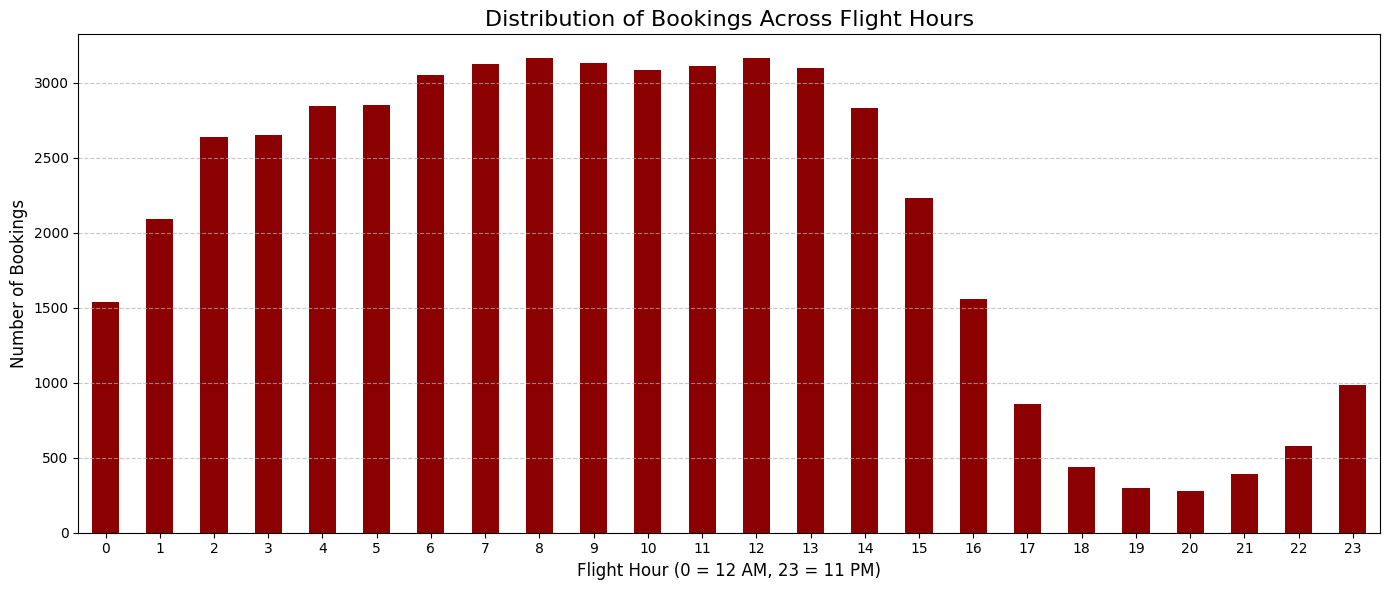

In [28]:
bookings_df = Passanger_Booking_Data

# 2. Calculate the number of completed bookings for each flight hour
hourly_bookings = bookings_df['flight_hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))

# Create a bar chart
hourly_bookings.plot(kind='bar', color='darkred') # Changed color for distinction

plt.title('Distribution of Bookings Across Flight Hours', fontsize=16)
plt.xlabel('Flight Hour (0 = 12 AM, 23 = 11 PM)', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=0, ha='center') # Ensure hours are readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot with a new name
plt.savefig('flight_hour_distribution.png')
print(hourly_bookings)

flight_hour
0     182
1     285
2     389
3     393
4     430
5     431
6     489
7     423
8     484
9     508
10    415
11    407
12    460
13    503
14    489
15    376
16    297
17    167
18     85
19     39
20     25
21     45
22     54
23    103
Name: count, dtype: int64


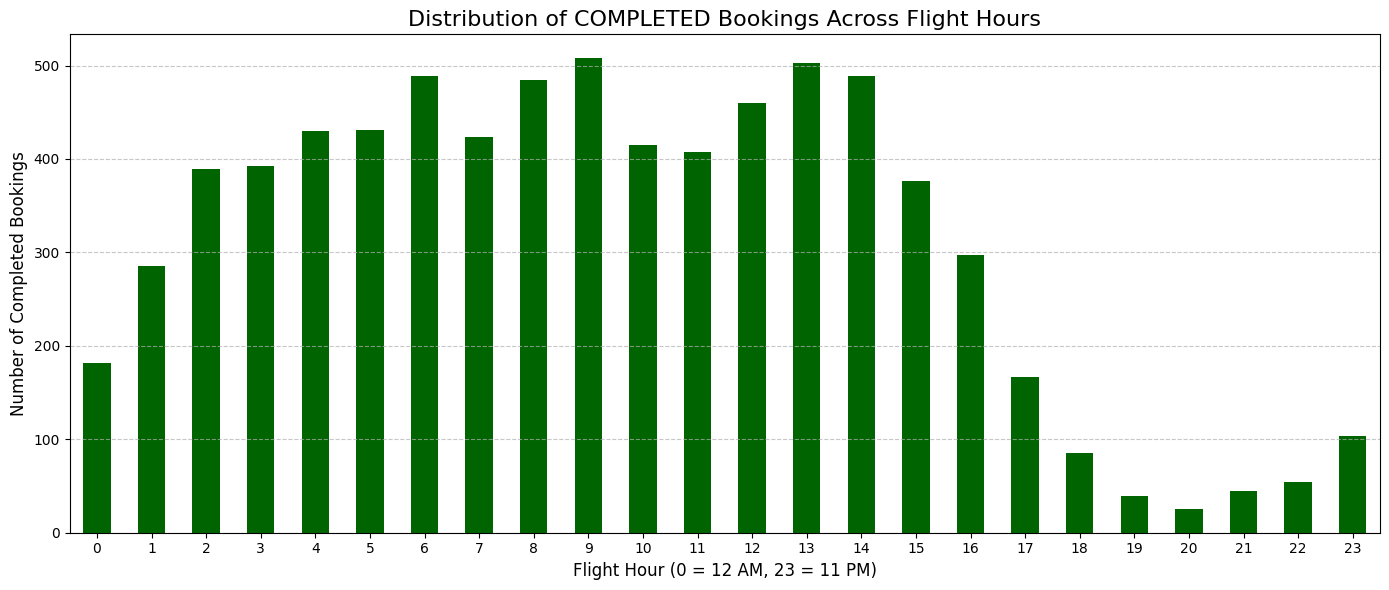

In [29]:
completed_bookings_df = Passanger_Booking_Data[Passanger_Booking_Data['booking_complete'] == 1]

hourly_bookings = completed_bookings_df['flight_hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))

hourly_bookings.plot(kind='bar', color='darkgreen') # Changed color for distinction

plt.title('Distribution of COMPLETED Bookings Across Flight Hours', fontsize=16)
plt.xlabel('Flight Hour (0 = 12 AM, 23 = 11 PM)', fontsize=12)
plt.ylabel('Number of Completed Bookings', fontsize=12)
plt.xticks(rotation=0, ha='center') # Ensure hours are readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot with a new name
plt.savefig('completed_flight_hour_distribution.png')
print(hourly_bookings)

In [30]:
combination_ratings = AirlineScrappedReview.groupby(['Traveller_Type', 'Class'])['Rating'].mean()

highest_rating_combo = combination_ratings.idxmax()
highest_rating_score = combination_ratings.max()

lowest_rating_combo = combination_ratings.idxmin()
lowest_rating_score = combination_ratings.min()

print("--- Traveler Type and Class Rating Analysis ---")
print("\n🏆 Highest Rated Combination:")
print(f"  Combination: {highest_rating_combo[0]} in {highest_rating_combo[1]}")
print(f"  Average Rating: {highest_rating_score:.3f}")

print("\n📉 Lowest Rated Combination:")
print(f"  Combination: {lowest_rating_combo[0]} in {lowest_rating_combo[1]}")
print(f"  Average Rating: {lowest_rating_score:.3f}")

--- Traveler Type and Class Rating Analysis ---

🏆 Highest Rated Combination:
  Combination: Solo Leisure in First Class
  Average Rating: 6.526

📉 Lowest Rated Combination:
  Combination: Various in Economy Class
  Average Rating: 1.000


PRE-PROCESSING & FEATURE ENGINEERING

In [31]:
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

In [32]:
AirlineScrappedReview['Verified'] = AirlineScrappedReview['Verified'].map({
    'Trip Verified': 1,
    'Not Verified': 0
})

AirlineScrappedReview = pd.get_dummies(AirlineScrappedReview,
                                       columns=['Traveller_Type', 'Class'],
                                       drop_first=True,
                                       dtype=int)

AirlineScrappedReview['is_layover'] = (AirlineScrappedReview['Layover_Route'] != 'None').astype(int)

AirlineScrappedReview['flight_distance_km'] = haversine(
    AirlineScrappedReview['Start_Latitude'],
    AirlineScrappedReview['Start_Longitude'],
    AirlineScrappedReview['End_Latitude'],
    AirlineScrappedReview['End_Longitude']
)

start_freq = AirlineScrappedReview['Start_Location'].map(AirlineScrappedReview['Start_Location'].value_counts())
end_freq = AirlineScrappedReview['End_Location'].map(AirlineScrappedReview['End_Location'].value_counts())
AirlineScrappedReview['start_loc_freq'] = start_freq
AirlineScrappedReview['end_loc_freq'] = end_freq

AirlineScrappedReview['start_country'] = AirlineScrappedReview['Start_Address'].apply(lambda x: x.split(',')[-1].strip())
AirlineScrappedReview['end_country'] = AirlineScrappedReview['End_Address'].apply(lambda x: x.split(',')[-1].strip())
AirlineScrappedReview['is_international'] = (AirlineScrappedReview['start_country'] != AirlineScrappedReview['end_country']).astype(int)

AirlineScrappedReview = AirlineScrappedReview.drop(['Start_Address', 'End_Address', 'Layover_Route', 'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude', 'start_country', 'end_country', 'Review_content', 'Route'], axis=1)

SPLIT

In [33]:
X = AirlineScrappedReview.drop('Satisfaction', axis=1)
y = AirlineScrappedReview['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

FEATURE ENGINEERING

  FEATURE SET 1

In [34]:
X1_train = X_train.copy()
X1_test = X_test.copy()

numerical_cols_1 = ['Sentiment_Score', 'flight_distance_km', 'start_loc_freq', 'end_loc_freq']
scaler1 = StandardScaler()


X1_train[numerical_cols_1] = scaler1.fit_transform(X1_train[numerical_cols_1])

X1_test[numerical_cols_1] = scaler1.transform(X1_test[numerical_cols_1])

X1_train = X1_train.drop(['Start_Location', 'End_Location', 'Rating'], axis=1)
X1_test = X1_test.drop(['Start_Location', 'End_Location', 'Rating'], axis=1)

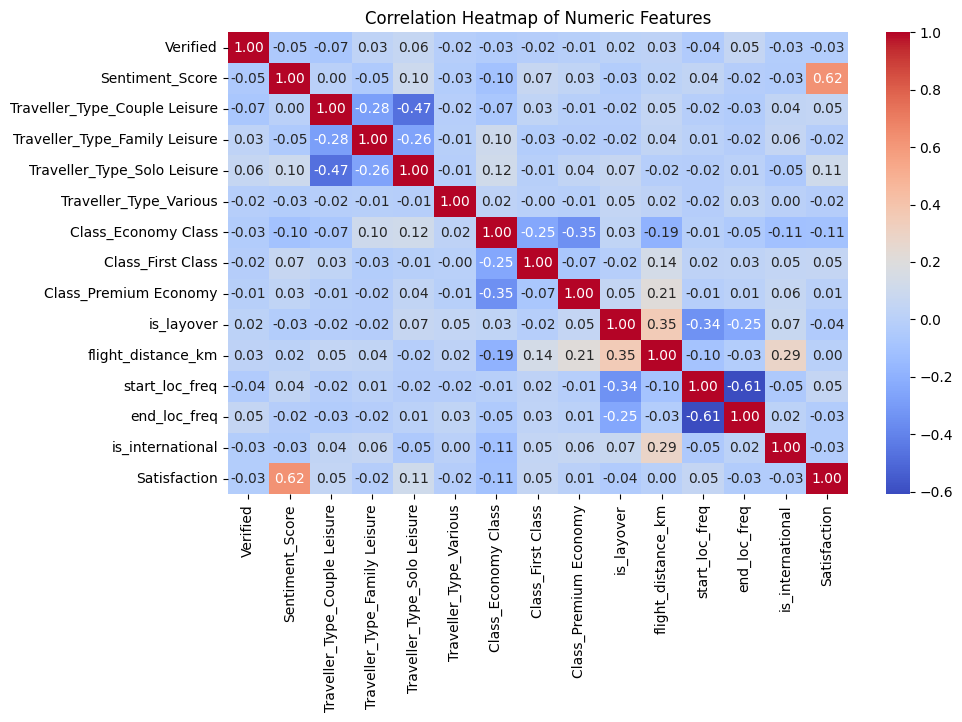

In [35]:
df_concat = pd.concat([X1_train, y_train], axis=1)
numeric_df = df_concat.select_dtypes(include=['int64', 'float64'])


pivot = numeric_df.corr()


plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

FEATURE SET 2

In [36]:
X2_train = X_train.copy()
X2_test = X_test.copy()

start_loc_map = X2_train.groupby('Start_Location')['Rating'].mean()
end_loc_map = X2_train.groupby('End_Location')['Rating'].mean()

X2_train['Start_Loc_Avg_Rating'] = X2_train['Start_Location'].map(start_loc_map)
X2_train['End_Loc_Avg_Rating'] = X2_train['End_Location'].map(end_loc_map)

X2_test['Start_Loc_Avg_Rating'] = X2_test['Start_Location'].map(start_loc_map)
X2_test['End_Loc_Avg_Rating'] = X2_test['End_Location'].map(end_loc_map)

global_mean_rating = X2_train['Rating'].mean()
X2_test['Start_Loc_Avg_Rating'].fillna(global_mean_rating, inplace=True)
X2_test['End_Loc_Avg_Rating'].fillna(global_mean_rating, inplace=True)

X2_train = X2_train.drop(['start_loc_freq', 'end_loc_freq'], axis=1)
X2_test = X2_test.drop(['start_loc_freq', 'end_loc_freq'], axis=1)

numerical_cols_2 = ['Sentiment_Score', 'flight_distance_km', 'Start_Loc_Avg_Rating', 'End_Loc_Avg_Rating']
scaler2 = StandardScaler()


X2_train[numerical_cols_2] = scaler2.fit_transform(X2_train[numerical_cols_2])

X2_test[numerical_cols_2] = scaler2.transform(X2_test[numerical_cols_2])

X2_train = X2_train.drop(['Start_Location', 'End_Location', 'Rating'], axis=1)
X2_test = X2_test.drop(['Start_Location', 'End_Location', 'Rating'], axis=1)

/tmp/ipython-input-639414214.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X2_test['Start_Loc_Avg_Rating'].fillna(global_mean_rating, inplace=True)
/tmp/ipython-input-639414214.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

MODEL DEFINITIONS

In [37]:
# Models 1 & 3 use the Frequency Encoded dataset
model1 = Sequential([
    Input(shape=(X1_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

model3 = Sequential([
    Input(shape=(X1_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

# Model 2 uses the Target Encoded dataset
model2 = Sequential([
    Input(shape=(X2_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

print(f"X1_train shape: {X1_train.shape}")
print(f"X2_train shape: {X2_train.shape}")

X1_train shape: (2116, 14)
X2_train shape: (2116, 14)


In [38]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       Precision(name='precision'),
                       Recall(name='recall')])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       Precision(name='precision'),
                       Recall(name='recall')])

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       Precision(name='precision'),
                       Recall(name='recall')])

In [39]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history1 = model1.fit(X1_train, y_train,
                      epochs=50,
                      validation_split=0.2,
                      verbose=1,
                      callbacks=[early_stop])

history2 = model2.fit(X2_train, y_train,
                      epochs=50,
                      validation_split=0.2,
                      verbose=1,
                      callbacks=[early_stop])

history3 = model3.fit(X1_train, y_train,
                      epochs=50,
                      validation_split=0.2,
                      verbose=1,
                      callbacks=[early_stop])

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6020 - loss: 0.6768 - precision: 0.5908 - recall: 0.1202 - val_accuracy: 0.6179 - val_loss: 0.6559 - val_precision: 0.6000 - val_recall: 0.1579
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6091 - loss: 0.6445 - precision: 0.6611 - recall: 0.2042 - val_accuracy: 0.6533 - val_loss: 0.6068 - val_precision: 0.6765 - val_recall: 0.2690
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6884 - loss: 0.5889 - precision: 0.7674 - recall: 0.3967 - val_accuracy: 0.7335 - val_loss: 0.5417 - val_precision: 0.7164 - val_recall: 0.5614
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7768 - loss: 0.5201 - precision: 0.7664 - recall: 0.6784 - val_accuracy: 0.7783 - val_loss: 0.4897 - val_precision: 0.7016 - val_recall: 0.7836
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7860 - loss: 0.4835 - precision: 0.7324 - recall: 0.8150 - val_accuracy: 0.7877 - val_loss: 0.4688 - va

Plotting history for Model 1...
Saved plot to model1_history.png


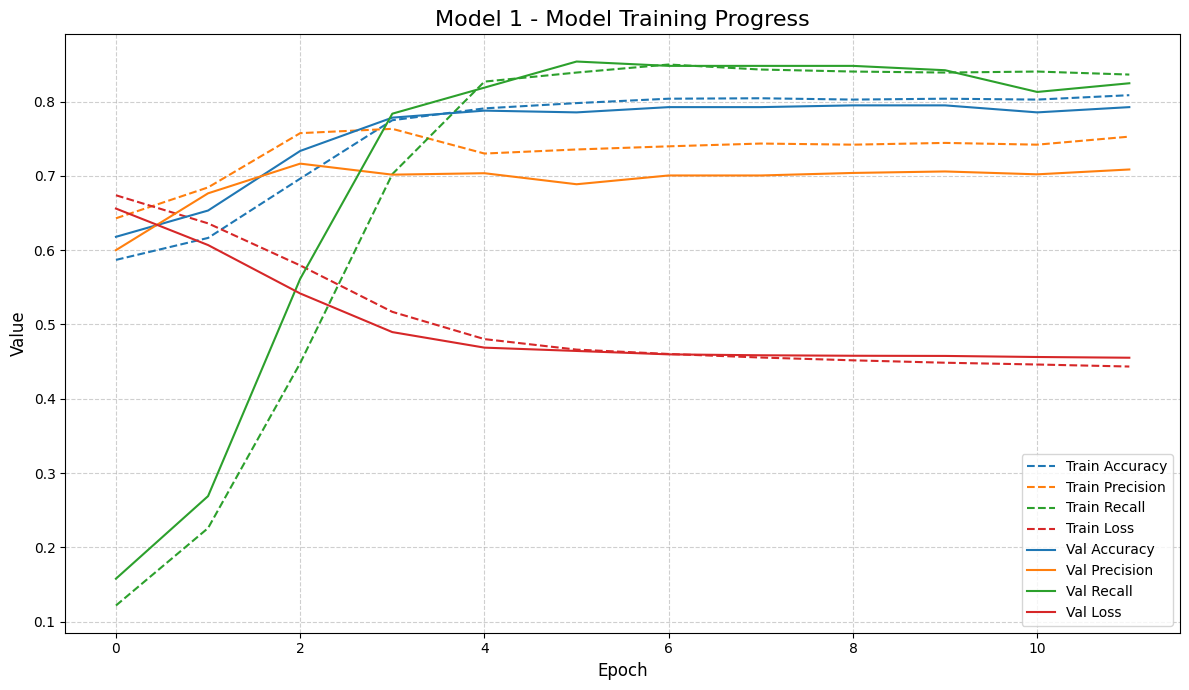

Plotting history for Model 2...
Saved plot to model2_history.png


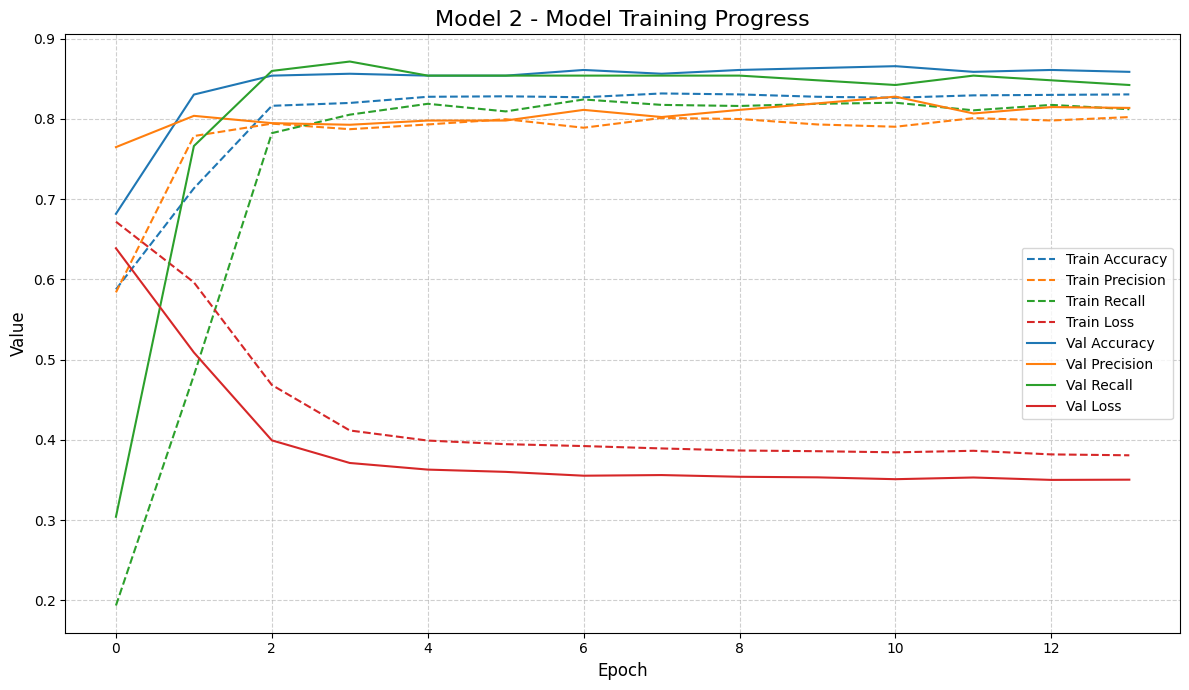

Plotting history for Model 3...
Saved plot to model3_history.png


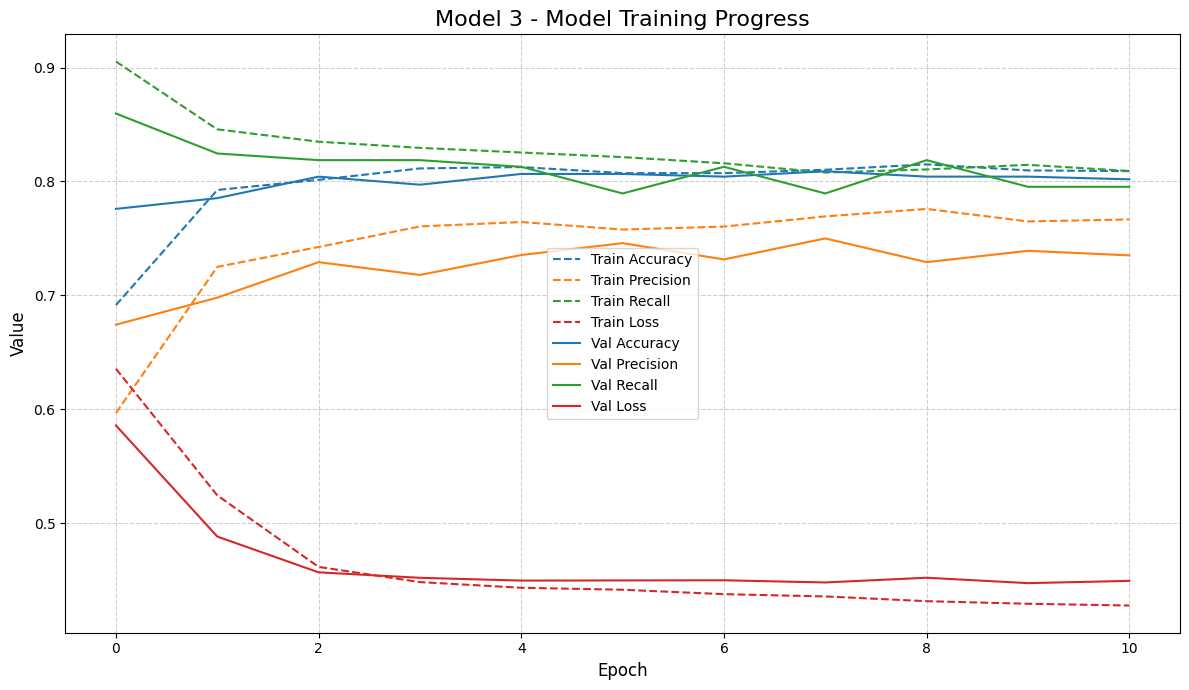

In [40]:
import matplotlib.pyplot as plt

def plot_model_history(history, model_name, file_name=None):
    """
    Plots model history with a single plot for all metrics:
    Accuracy, Precision, Recall, and Loss
    """
    print(f"Plotting history for {model_name}...")

    # Check if history object is empty or metrics are missing
    if not history or not history.history:
        print(f"History object for {model_name} is empty. Skipping plot.")
        return

    # --- Create Figure ---
    plt.figure(figsize=(12, 7)) # Single, larger plot

    # --- Plot All Metrics ---
    plt.title(f'{model_name} - Model Training Progress', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Value', fontsize=12)

    # Plot Train Metrics (dashed lines)
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='--', color='#1f77b4')
    if 'precision' in history.history:
        plt.plot(history.history['precision'], label='Train Precision', linestyle='--', color='#ff7f0e')
    if 'recall' in history.history:
        plt.plot(history.history['recall'], label='Train Recall', linestyle='--', color='#2ca02c')
    if 'loss' in history.history:
        plt.plot(history.history['loss'], label='Train Loss', linestyle='--', color='#d62728') # Red

    # Plot Validation Metrics (solid lines)
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='#1f77b4')
    if 'val_precision' in history.history:
        plt.plot(history.history['val_precision'], label='Val Precision', color='#ff7f0e')
    if 'val_recall' in history.history:
        plt.plot(history.history['val_recall'], label='Val Recall', color='#2ca02c')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Val Loss', color='#d62728') # Red

    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save the figure if a filename is provided
    if file_name:
        plt.savefig(file_name)
        print(f"Saved plot to {file_name}")

    # Show the plot in the notebook
    plt.show()

# --- Call the new function for each model ---
plot_model_history(history1, "Model 1", "model1_history.png")
plot_model_history(history2, "Model 2", "model2_history.png")
plot_model_history(history3, "Model 3", "model3_history.png")

Model Evaluations and Comparisons

In [41]:
metrics1 = model1.evaluate(X1_test, y_test, verbose=0)
y_pred1 = (model1.predict(X1_test, verbose=0) > 0.5).astype("int32")
f1_1 = f1_score(y_test, y_pred1)

metrics2 = model2.evaluate(X2_test, y_test, verbose=0)
y_pred2 = (model2.predict(X2_test, verbose=0) > 0.5).astype("int32")
f1_2 = f1_score(y_test, y_pred2)

metrics3 = model3.evaluate(X1_test, y_test, verbose=0)
y_pred3 = (model3.predict(X1_test, verbose=0) > 0.5).astype("int32")
f1_3 = f1_score(y_test, y_pred3)


results = {
    'Model': ['Model 1 (Freq Enc)', 'Model 2 (Target Enc)', 'Model 3 (Freq Enc, Deeper)'],
    'Test Loss': [metrics1[0], metrics2[0], metrics3[0]],
    'Accuracy': [metrics1[1], metrics2[1], metrics3[1]],
    'Precision': [metrics1[2], metrics2[2], metrics3[2]],
    'Recall': [metrics1[3], metrics2[3], metrics3[3]],
    'F1-Score': [f1_1, f1_2, f1_3]
}

df_results = pd.DataFrame(results)

print("--- Model Evaluation Results ---")
print(df_results.to_markdown(index=False))

--- Model Evaluation Results ---
| Model                      |   Test Loss |   Accuracy |   Precision |   Recall |   F1-Score |
|:---------------------------|------------:|-----------:|------------:|---------:|-----------:|
| Model 1 (Freq Enc)         |    0.448404 |   0.816635 |    0.767347 | 0.824561 |   0.794926 |
| Model 2 (Target Enc)       |    0.506848 |   0.765595 |    0.757426 | 0.671053 |   0.711628 |
| Model 3 (Freq Enc, Deeper) |    0.440013 |   0.824197 |    0.8      | 0.789474 |   0.794702 |


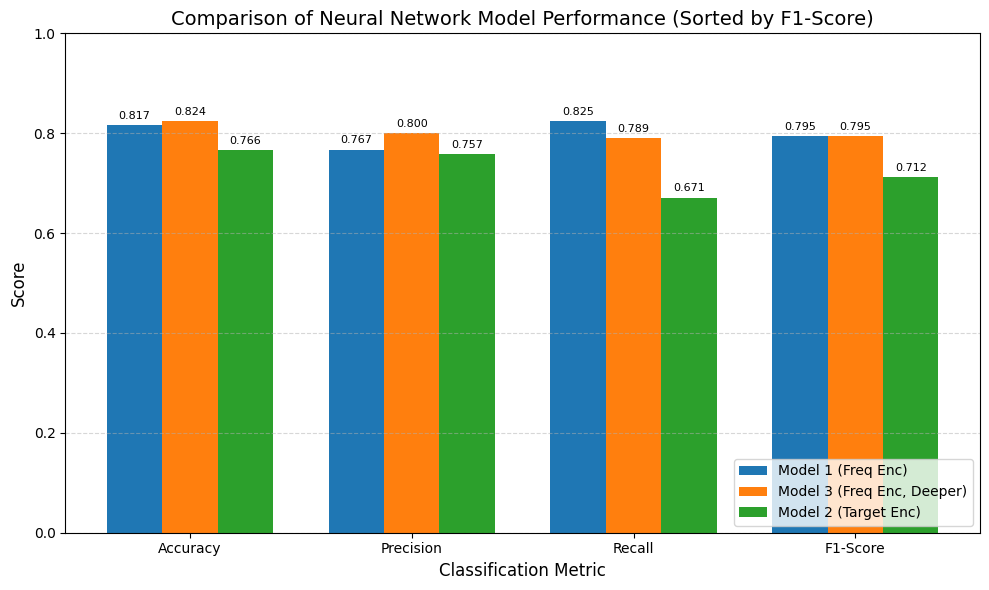

In [42]:
df_sorted = df_results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

best_model = df_sorted.iloc[0]

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plot_data = df_sorted.set_index('Model')[metrics_to_plot].T
models = plot_data.columns.tolist()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(metrics_to_plot))

rects1 = ax.bar(index, plot_data[models[0]], bar_width, label=models[0], color='#1f77b4')
rects2 = ax.bar(index + bar_width, plot_data[models[1]], bar_width, label=models[1], color='#ff7f0e')
rects3 = ax.bar(index + 2*bar_width, plot_data[models[2]], bar_width, label=models[2], color='#2ca02c')

ax.set_ylabel('Score', fontsize=12)
ax.set_xlabel('Classification Metric', fontsize=12)
ax.set_title('Comparison of Neural Network Model Performance (Sorted by F1-Score)', fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics_to_plot)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.0)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('model_comparison_f1_sorted_new.png')

Explainability

In [43]:
import shap
import lime
import lime.lime_tabular
import pandas as pd
import numpy as np

# --- 1. Define Our "Best" Model and Data ---
best_model = model1
X_train_processed = X1_train
X_test_processed = X1_test

print("--- 1. Setting up LIME ---")
# LIME Wrapper function
def lime_predict_fn(data_as_numpy):
    if data_as_numpy.ndim == 1:
        data_as_numpy = data_as_numpy.reshape(1, -1)
    prob_satisfied = best_model.predict(data_as_numpy, verbose=0)
    prob_dissatisfied = 1 - prob_satisfied
    return np.hstack([prob_dissatisfied, prob_satisfied])

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed.values,
    feature_names=X_train_processed.columns.tolist(),
    class_names=['Dissatisfied', 'Satisfied'],
    mode='classification',
    random_state=42
)
print("LIME Explainer created.")


print("\n--- 2. Setting up SHAP (using standard Explainer) ---")
shap.initjs()

background_data = shap.sample(X_train_processed, 100, random_state=42)

shap_explainer = shap.Explainer(best_model, background_data, feature_names=X_train_processed.columns)
print("SHAP Explainer (Kernel) created.")

print("\n--- 3. Calculating Global SHAP Values ---")
print(f"Calculating SHAP values for {X_test_processed.shape[0]} test samples.")
print("This will take several minutes. Please be patient...")

shap_values_test = shap_explainer(X_test_processed)

print("Global SHAP values (Explanation object) calculated for the test set.")

--- 1. Setting up LIME ---
LIME Explainer created.

--- 2. Setting up SHAP (using standard Explainer) ---


SHAP Explainer (Kernel) created.

--- 3. Calculating Global SHAP Values ---
Calculating SHAP values for 529 test samples.
This will take several minutes. Please be patient...


PermutationExplainer explainer: 530it [01:22,  6.29it/s]

Global SHAP values (Explanation object) calculated for the test set.


--- Global Feature Importance ---


/tmp/ipython-input-2066045739.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_test.values, X_test_processed)


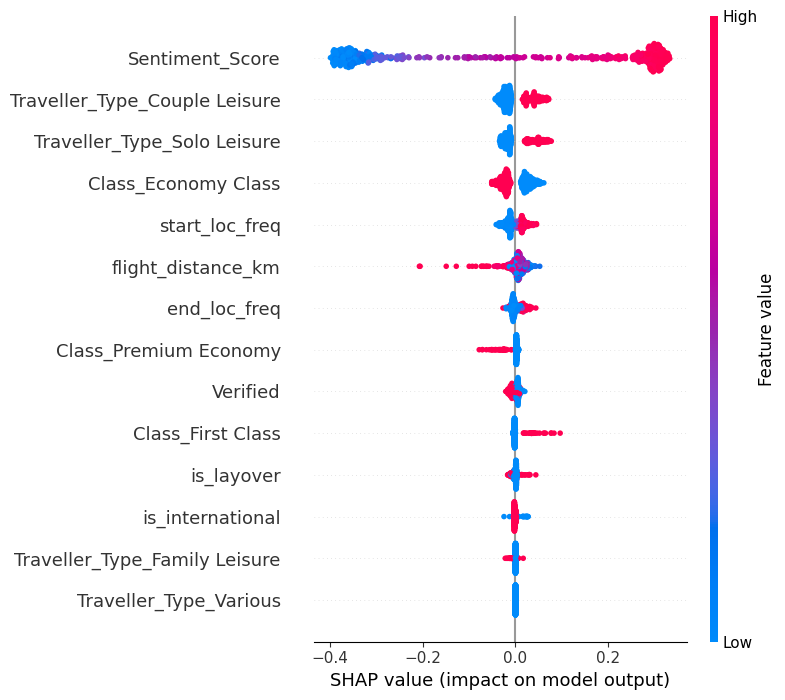

Sentiment_Score                  0.281183
Traveller_Type_Couple Leisure    0.027697
Traveller_Type_Solo Leisure      0.027197
Class_Economy Class              0.026277
start_loc_freq                   0.015737
flight_distance_km               0.013868
end_loc_freq                     0.009061
Class_Premium Economy            0.005865
Verified                         0.005748
Class_First Class                0.005067
is_layover                       0.003662
is_international                 0.002287
Traveller_Type_Family Leisure    0.001055
Traveller_Type_Various           0.000000
dtype: float64


In [44]:
print("--- Global Feature Importance ---")
shap.initjs()
shap.summary_plot(shap_values_test.values, X_test_processed)
shap_df = pd.DataFrame(shap_values_test.values, columns=X_train_processed.columns)
print(shap_df.abs().mean().sort_values(ascending=False))

In [45]:
print("\n--- Local Explanation: LIME ---")

# --- 1. Define the instance we're explaining ---
instance_index = 10
instance_to_explain_lime = X_test_processed.iloc[instance_index]

print(f"Explaining instance {instance_index}")

# --- 2. Get Model Prediction ---
pred_prob = best_model.predict(instance_to_explain_lime.values.reshape(1, -1), verbose=0)[0][0]
pred_label = "Satisfied" if pred_prob > 0.5 else "Dissatisfied"
print(f"Model Prediction: {pred_label} (Confidence: {pred_prob:.2%})")

# --- 3. Generate and Show LIME Explanation ---
lime_explanation = lime_explainer.explain_instance(
    data_row=instance_to_explain_lime.values,
    predict_fn=lime_predict_fn,
    num_features=10, # Show top 10 features
    top_labels=1 # Only show explanation for the top-predicted class
)

print("\nLIME Explanation:")
lime_explanation.show_in_notebook(show_table=True)


--- Local Explanation: LIME ---
Explaining instance 10
Model Prediction: Dissatisfied (Confidence: 16.13%)

LIME Explanation:


In [46]:
print("\n--- Local Explanation: SHAP Force Plot ---")
shap.initjs()

instance_index = 10

instance_shap_explanation = shap_values_test[instance_index]
instance_features = X_test_processed.iloc[instance_index]

print(f"Explaining instance {instance_index}")
print(f"Model Prediction: {pred_label} (Confidence: {pred_prob:.2%})") # Uses pred_label from LIME cell

base_value = instance_shap_explanation.base_values
if isinstance(base_value, np.ndarray):
    base_value = base_value[0] # Select first (only) output

print(f"SHAP Base Value: {base_value:.4f}")
shap.force_plot(
    base_value=base_value,
    shap_values=instance_shap_explanation.values,
    features=instance_features.values,
    feature_names=X_test_processed.columns.tolist()
)


--- Local Explanation: SHAP Force Plot ---


Explaining instance 10
Model Prediction: Dissatisfied (Confidence: 16.13%)
SHAP Base Value: 0.4466


INFERENCE

In [47]:
def predict_satisfaction(raw_input: dict):
    features_df = pd.DataFrame(columns=X1_train.columns.tolist(), index=[0]).fillna(0)

    features_df['Sentiment_Score'] = sia.polarity_scores(raw_input.get('Review_content', ''))['compound']

    features_df['Verified'] = 1 if raw_input.get('Verified') == 'Trip Verified' else 0

    layover = raw_input.get('Layover_Route') or "None" # Handle None/NaN
    features_df['is_layover'] = 1 if layover != "None" else 0

    features_df['flight_distance_km'] = haversine(
            raw_input['Start_Latitude'], raw_input['Start_Longitude'],
            raw_input['End_Latitude'], raw_input['End_Longitude'])

    features_df['start_loc_freq'] = (AirlineScrappedReview['Start_Location'].value_counts().to_dict()).get(raw_input.get('Start_Location'), 0)
    features_df['end_loc_freq'] = (AirlineScrappedReview['End_Location'].value_counts().to_dict()).get(raw_input.get('End_Location'), 0)

    start_country = raw_input.get('Start_Address', '').split(',')[-1].strip()
    end_country = raw_input.get('End_Address', '').split(',')[-1].strip()
    features_df['is_international'] = 1 if (start_country != end_country and start_country != '') else 0

    tt_col = f"Traveller_Type_{raw_input.get('Traveller_Type')}"
    if tt_col in features_df.columns:
        features_df[tt_col] = 1

    class_col = f"Class_{raw_input.get('Class')}"
    if class_col in features_df.columns:
        features_df[class_col] = 1

    numerical_cols = ['Sentiment_Score', 'flight_distance_km', 'start_loc_freq', 'end_loc_freq']
    features_df[numerical_cols] = scaler1.transform(features_df[numerical_cols])

    probability = model1.predict(features_df)[0][0]
    prediction = 1 if probability >= 0.5 else 0

    # --- 6. Return Natural Language Output ---
    satisfaction_label = "Satisfied" if prediction == 1 else "Dissatisfied"
    confidence = probability if prediction == 1 else 1 - probability

    return f"Prediction: {satisfaction_label} (Confidence: {confidence:.2%})"

In [48]:
# Scenario 1: Dissatisfied
scenario_1_dissatisfied = {
    "Verified": "Trip Verified",
    "Review_content": "This was, without a doubt, the worst long-haul flight of my life. The nightmare began at check-in where the staff were rude and unhelpful. The flight from Chicago was delayed by 3 hours with no explanation. This meant I had to sprint through LAX to make my connection, which they barely held. Once on board, my seat was cramped and the entertainment screen was broken. The food was a tasteless, lukewarm mush. To top it all off, when I finally arrived in Tokyo, my luggage was lost. It's been 48 hours and I still have no update. An absolutely abysmal experience from start to finish.",
    "Traveller_Type": "Solo Leisure",
    "Class": "Economy Class",
    "Start_Location": "Chicago",
    "End_Location": "Tokyo",
    "Layover_Route": "LAX",
    "Start_Latitude": 41.9769,
    "Start_Longitude": -87.9081,
    "Start_Address": "10000 W O'Hare Ave, Chicago, IL 60666, United States",
    "End_Latitude": 35.7647,
    "End_Longitude": 140.386,
    "End_Address": "1-1 Furugome, Narita, Chiba 282-0004, Japan"
}

# Scenario 2: Satisfied
scenario_2_satisfied = {
    "Verified": "Trip Verified",
    "Review_content": "A truly flawless journey from London to Dubai. Boarding was prioritized and incredibly efficient. From the moment I stepped on board, the cabin crew was attentive, professional, and genuinely welcoming, offering a glass of champagne right away. The lie-flat bed in business class was extremely comfortable, and the amenity kit was well-stocked. The three-course meal was restaurant-quality, and the wine selection was excellent. We arrived in Dubai 20 minutes ahead of schedule, and my bags were one of the first off the carousel. This is how flying should be. Highly recommended.",
    "Traveller_Type": "Couple Leisure",
    "Class": "Business Class",
    "Start_Location": "London",
    "End_Location": "Dubai",
    "Layover_Route": np.nan, # Or "None", the function handles both
    "Start_Latitude": 51.4706,
    "Start_Longitude": -0.4619,
    "Start_Address": "Heathrow Airport, Hounslow, Middlesex, TW6 1EW, United Kingdom",
    "End_Latitude": 25.2531,
    "End_Longitude": 55.3644,
    "End_Address": "Dubai International Airport, Al Garhoud, Dubai, United Arab Emirates"
}


# --- Run the function ---
print("--- Running Inference ---")

# Test Example 1
prediction_1 = predict_satisfaction(scenario_1_dissatisfied)
print(f"Example 1 Input (Chicago to Tokyo):\n {prediction_1}")

# Test Example 2
prediction_2 = predict_satisfaction(scenario_2_satisfied)
print(f"Example 2 Input (London to Dubai):\n {prediction_2}")

--- Running Inference ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Example 1 Input (Chicago to Tokyo):
 Prediction: Dissatisfied (Confidence: 96.76%)


/tmp/ipython-input-668810383.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features_df = pd.DataFrame(columns=X1_train.columns.tolist(), index=[0]).fillna(0)
/tmp/ipython-input-668810383.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features_df = pd.DataFrame(columns=X1_train.columns.tolist(), index=[0]).fillna(0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Example 2 Input (London to Dubai):
 Prediction: Satisfied (Confidence: 78.28%)
